In this Dojo we will work with the Titanic data set and predict the survivors
.

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [2]:
#from google.colab import drive
#drive.mount('/content/drive')
import os
#path="/content/drive/My Drive/Colab Notebooks/WCS/"
path=os.getcwd()



In [3]:
path

'/home/A19893678/GDA3B2021/GDRIVE/Week5 - NN Backpropagation, Tuning etc.'

In [4]:
# Load data as Pandas dataframe
train = pd.read_csv(path  + '/train_clean.csv', )
test = pd.read_csv(path  + '/test_clean.csv')
df = pd.concat([train, test], axis=0, sort=True)
df.describe()

,Age,Family_Size,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.562391,0.883881,33.276193,0.385027,655.000000,2.294882,0.498854,0.383838
std,13.165360,1.583639,51.743584,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,22.000000,0.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,30.000000,0.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,35.500000,1.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,10.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1309 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1309 non-null   object 
 3   Family_Size  1309 non-null   int64  
 4   Fare         1309 non-null   float64
 5   Name         1309 non-null   object 
 6   Parch        1309 non-null   int64  
 7   PassengerId  1309 non-null   int64  
 8   Pclass       1309 non-null   int64  
 9   Sex          1309 non-null   object 
 10  SibSp        1309 non-null   int64  
 11  Survived     891 non-null    float64
 12  Ticket       1309 non-null   object 
 13  Title        1309 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 153.4+ KB


Explore the data

How many data points do we have here?
- 1309 feature records,891 labels

What is the format of the data points
- Integers and objects

How many labels do we have?
- 2 labels (0,1)
What is the format of the labels?
- float
What else would you like to know?
missing values
- fields Cabin and Survived have missing values

# Preprocessing 



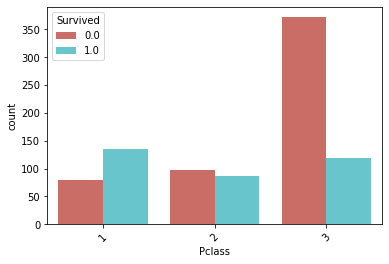

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Pclass', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()


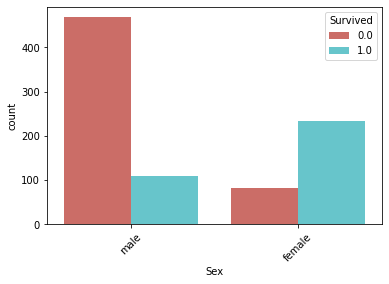

In [7]:
sns.countplot(x='Sex', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

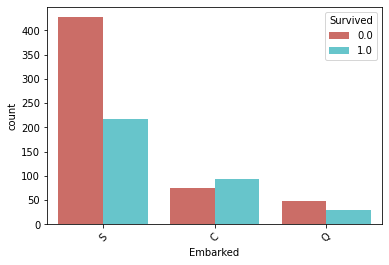

In [8]:
sns.countplot(x='Embarked', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

Encode Categorical Variables
We need to convert all categorical variables into numeric format. The categorical variables we will be keeping are Embarked, Sex and Title.


In [9]:
input=df.drop(columns=['Cabin','Name','Ticket','PassengerId'])

drop the variables we won't be using 'Cabin', 'Name', 'Ticket', 'PassengerId'

In [10]:
input.head()

,Age,Embarked,Family_Size,Fare,Parch,Pclass,Sex,SibSp,Survived,Title
0,22.0,S,1,7.2500,0,3,male,1,0.0,Mr
1,38.0,C,1,71.2833,0,1,female,1,1.0,Mrs
2,26.0,S,0,7.9250,0,3,female,0,1.0,Miss
3,35.0,S,1,53.1000,0,1,female,1,1.0,Mrs
4,35.0,S,0,8.0500,0,3,male,0,0.0,Mr


In [11]:
#input['Embarked'].get_dummies()
#input['Embarked'].factorize()[0]
#input['Sex']=input['Sex'].factorize()[0]
#input['Title']=input['Title'].factorize()[0]
input=pd.get_dummies(input, columns=["Sex","Embarked","Title"],drop_first=True)

In [12]:
#from sklearn.preprocessing import OneHotEncoder
#input1hot=OneHotEncoder().fit_transform(input)


Scale Continuous Variables
The continuous variables need to be scaled. This is done using a standard scaler from SkLearn.


In [13]:
X=input.drop(columns='Survived')
y=pd.DataFrame(input['Survived'])


In [14]:
X_train = input[pd.notnull(input['Survived'])]
y_train = y[pd.notnull(y['Survived'])]['Survived']
X_test = input[pd.isnull(input['Survived'])]

In [15]:
#print("Xtrain", X_train.shape, "y_train: ", y_train.shape, "X-test", X_test.shape)
XX_train,X_val,yy_train,y_val=train_test_split(X_train,y_train,test_size=.1,random_state=42)


In [16]:
XX_train.shape,yy_train.shape,yy_train.shape,y_val.shape

((801, 15), (801,), (801,), (90,))

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#scaler.fit(XX_train[['Fare','Family_Size','Age','Pclass','Parch','SibSp']])
#XX_train[['Fare','Family_Size','Age','Pclass','Parch','SibSp']]=XX_train[['Fare','Family_Size','Age','Pclass','Parch','SibSp']].apply(lambda x: scaler.fit_transform(x))
#XX_train
#data[['Age','Weight']] = data[['Age','Weight']].apply(lambda x: StandardScaler().fit_transform(x))
#for col in ['Fare','Family_Size','Age','Pclass','Parch','SibSp']:
#    XX_train[loc]=pd.Series(scaler.fit_transform(XX_train[col]))
#XX_train
scaler.fit(XX_train)
XX_train=scaler.transform(XX_train)


In [18]:
X_val=scaler.transform(X_val)


In [19]:
X_test=scaler.transform(X_test)

In [130]:
#pd.Series(XX_train[:,0])

# Neural Network¶
Now, all that is left is to feed our data that has been cleaned, encoded and scaled to our neural network.

But first, we need to separate data_df back into train and test sets.

     |████████████████████████████████| 71kB 4.8MB/s eta 0:00:011
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78935 sha256=1d55b56a1d3e90402fa69ddf901a1694733e318aecf19634cad8aaa5d207f1f2
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=8c316c6d9b62f997907a670ebf63da17a9b58a6035b243564655a08ce5191b5e
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [21]:
from tensorflow import keras
from tensorflow.keras import layers

In [25]:
print(XX_train.shape)
print(X_val.shape)
del hypermodel

(801, 15)
(90, 15)


Define a function buil_model that builds the model and complies it and uses an Early Stopping Callback



In [26]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from kerastuner import HyperModel
from keras.optimizers import Adamax,SGD,Adam
from kerastuner.tuners import RandomSearch

class build_model(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape
    def build(self, hp):
        model = Sequential()
        model.add(
            layers.Dense(
                units=hp.Int('units', 64, 257, 32, default=128),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu', 'tanh', 'sigmoid'],
                    default='relu'),
                input_shape=input_shape
            )
        )
        
        model.add(
            layers.Dense(
                units=hp.Int('units', 64, 257, 32, default=128),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu', 'tanh', 'sigmoid'],
                    default='relu')
            )
        )
        
        model.add(
            layers.Dropout(
                hp.Float(
                    'dropout',
                    min_value=0.1,
                    max_value=0.5,
                    default=0.005,
                    step=0.05)
            )
        )
        
        model.add(layers.Dense(1, activation='sigmoid'))
        
        model.compile(
            optimizer=Adam(),loss='binary_crossentropy',metrics=['accuracy']
        )
        
        return model

from keras.callbacks import EarlyStopping 
#allback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
# This callback will stop the training when there is no improvement in  
# the loss for three consecutive epochs.  
stop=EarlyStopping(monitor='loss', patience=3)
'''
history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5),
                    epochs=10, batch_size=1, callbacks=[callback],
                    verbose=0)
'''

input_shape = (XX_train.shape[1],)
hypermodel = build_model(input_shape)


tuner_rs = RandomSearch(
            hypermodel,
            objective='val_accuracy',
            seed=42,
            max_trials=10,
            executions_per_trial=2)
#tuner_rs.search(X_train, y_train, epochs=10, validation_split=0.2, verbose=0)
tuner_rs.search(XX_train,yy_train,epochs=5,validation_data=(X_val,y_val),callbacks=[stop])
best_model = tuner_rs.get_best_models(num_models=1)[0]



INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json
INFO:tensorflow:Oracle triggered exit


Train model
At this stage, we have our model. We have chosen a few hyperparameters such as the number of hidden layers, the number of neurons and the activation function.

The next step is to train the model on our training set. This step also requires us to choose a few more hyperparameters such as the loss function, the optimization algorithm, the number of epochs and the batch size.

In [27]:
loss, accuracy = best_model.evaluate(X_val, y_val)

3/3 [==============================] - 0s 717us/step - loss: 0.0683 - accuracy: 1.0000


In [28]:
tuner_rs.results_summary()


Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
units: 64
dense_activation: relu
dropout: 0.40000000000000013
Score: 1.0
Trial summary
Hyperparameters:
units: 256
dense_activation: relu
dropout: 0.5000000000000001
Score: 1.0
Trial summary
Hyperparameters:
units: 160
dense_activation: relu
dropout: 0.30000000000000004
Score: 1.0
Trial summary
Hyperparameters:
units: 96
dense_activation: tanh
dropout: 0.3500000000000001
Score: 1.0
Trial summary
Hyperparameters:
units: 128
dense_activation: relu
dropout: 0.25000000000000006
Score: 1.0
Trial summary
Hyperparameters:
units: 128
dense_activation: tanh
dropout: 0.45000000000000007
Score: 1.0
Trial summary
Hyperparameters:
units: 160
dense_activation: tanh
dropout: 0.25000000000000006
Score: 1.0
Trial summary
Hyperparameters:
units: 192
dense_activation: relu
dropout: 0.25000000000000006
Score: 1.0
Trial summary
Hyperparameters:
units: 64
dense_

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
units: 64
dense_activation: relu
dropout: 0.40000000000000013
Score: 1.0
Trial summary
Hyperparameters:
units: 256
dense_activation: relu
dropout: 0.5000000000000001
Score: 1.0
Trial summary
Hyperparameters:
units: 160
dense_activation: relu
dropout: 0.30000000000000004
Score: 1.0
Trial summary
Hyperparameters:
units: 96
dense_activation: tanh
dropout: 0.3500000000000001
Score: 1.0
Trial summary
Hyperparameters:
units: 128
dense_activation: relu
dropout: 0.25000000000000006
Score: 1.0
Trial summary
Hyperparameters:
units: 128
dense_activation: tanh
dropout: 0.45000000000000007
Score: 1.0
Trial summary
Hyperparameters:
units: 160
dense_activation: tanh
dropout: 0.25000000000000006
Score: 1.0
Trial summary
Hyperparameters:
units: 192
dense_activation: relu
dropout: 0.25000000000000006
Score: 1.0
Trial summary
Hyperparameters:
units: 64
dense_

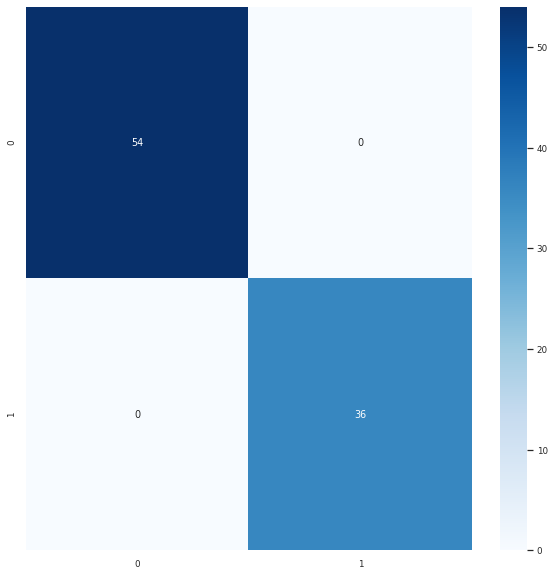

In [29]:
tuner_rs.results_summary()
predictions=np.rint(best_model.predict(X_val))
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
#yhat=net.predict_classes(X_test)
cm=confusion_matrix(y_val,predictions)
class_names=list(range(2))
import seaborn as sn
import pandas as pd


df_cm = pd.DataFrame(cm, class_names, class_names)
plt.figure(figsize=(10,10))
sn.set(font_scale=.8) # for label size
sn.heatmap(df_cm, annot=True,cmap='Blues',fmt='g') # font size

plt.show()

Access results and plot the train and validation loss and accuracy

# Tune the Hyperparameters using either GridSearch OR Keras Tuner
(Hidden Units, Layers, Dropout Rate if Dropout is used, Optimizers etc.)

In [23]:
pip install -U keras-tuner

Requirement already up-to-date: keras-tuner in /usr/local/lib/python3.7/dist-packages (1.0.2)


In [24]:
from kerastuner.tuners import RandomSearch

plot the summary of best model

# Make Predictions on Test Set 